### Importing the required Libraries

In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('../Data/PL-2021-22-Fixtures.xlsx')

df.head()

,Round,Venue,Result,Team,Opponent,xG,xGA,Season
0,Matchweek 1,Away,L,Arsenal,Brentford,1.4,1.3,21/22
1,Matchweek 2,Home,L,Arsenal,Chelsea,0.3,2.9,21/22
2,Matchweek 3,Away,L,Arsenal,Manchester City,0.1,3.8,21/22
3,Matchweek 4,Home,W,Arsenal,Norwich City,2.8,0.6,21/22
4,Matchweek 5,Away,W,Arsenal,Burnley,1.2,1.3,21/22


### Calculating xG difference per game

In [3]:
df['xGDiff'] = (
    df['xG'] - df['xGA']
)

df.head()

,Round,Venue,Result,Team,Opponent,xG,xGA,Season,xGDiff
0,Matchweek 1,Away,L,Arsenal,Brentford,1.4,1.3,21/22,0.1
1,Matchweek 2,Home,L,Arsenal,Chelsea,0.3,2.9,21/22,-2.6
2,Matchweek 3,Away,L,Arsenal,Manchester City,0.1,3.8,21/22,-3.7
3,Matchweek 4,Home,W,Arsenal,Norwich City,2.8,0.6,21/22,2.2
4,Matchweek 5,Away,W,Arsenal,Burnley,1.2,1.3,21/22,-0.1


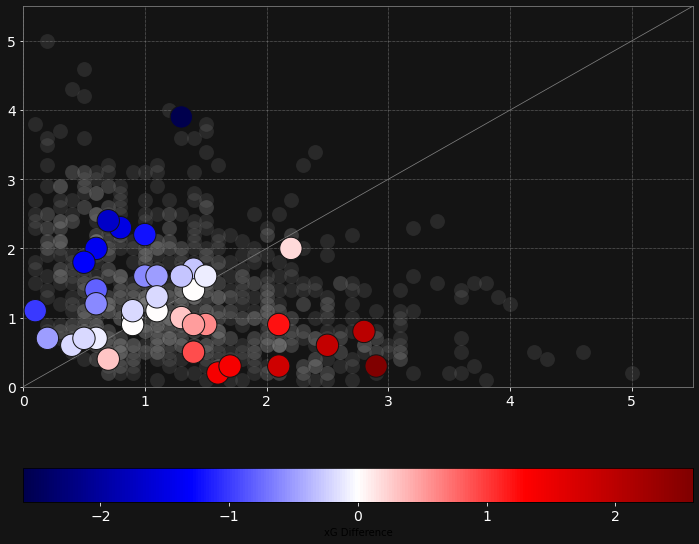

In [51]:
from turtle import color


fig, ax = plt.subplots(figsize=(12,10))

bg = "#141414"

fig.set_facecolor(bg)
ax.patch.set_facecolor(bg)
ax.patch.set_alpha(0)

title_font = "Open Sans"
body_font = "Calibri"
text_col = "white"
filler = "grey"
team = "Brighton"

mpl.rcParams['xtick.color'] = text_col
mpl.rcParams['ytick.color'] = text_col
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

ax.set_ylim(0,5.5)
ax.set_xlim(0,5.5)

for side in ['right','left','top','bottom']:
    ax.spines['bottom'].set_color('grey')
    ax.spines['right'].set_color('grey')
    ax.spines['top'].set_color('grey')
    ax.spines['left'].set_color('grey')

ax.grid(
    ls="dotted",
    lw="0.5",
    color="lightgrey", 
    zorder=1
)

ax.plot(
    [5.5, 0], [5.5, 0],
    color='grey',
    lw=0.75,
    zorder=2
)

x = df['xG'].tolist()
y = df['xGA'].tolist()

ax.scatter(
    x,y,
    s=225,
    color=filler,
    edgecolors=bg, 
    alpha=0.2, 
    lw=0.5, 
    zorder=2
)

x_team = df[
    df.Team == team
].xG.tolist()

y_team = df[
    df.Team == team
].xGA.tolist()

col = df[
    df.Team == team
].xGDiff.tolist()

sc = ax.scatter(
    x_team,
    y_team,
    s=500,
    c=col,
    cmap='seismic',
    edgecolors=bg,
    alpha=1,
    zorder=3
)

c_bar =  plt.colorbar(
    sc,
    orientation='horizontal', 
    label='xG Difference'

)

